In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


     Preço do Petróleo ($)  Payoff do Bond ($)  Retorno do Bond (%)  \
0                      0.0              1000.0             2.040816   
1                      1.0              1000.0             2.040816   
2                      2.0              1000.0             2.040816   
3                      3.0              1000.0             2.040816   
4                      4.0              1000.0             2.040816   
..                     ...                 ...                  ...   
96                    96.0              1020.0             4.081633   
97                    97.0              1020.0             4.081633   
98                    98.0              1020.0             4.081633   
99                    99.0              1020.0             4.081633   
100                  100.0              1020.0             4.081633   

     Payoff do Short Future ($)  Payoff Total ($)  
0                          80.0            1080.0  
1                          79.0            

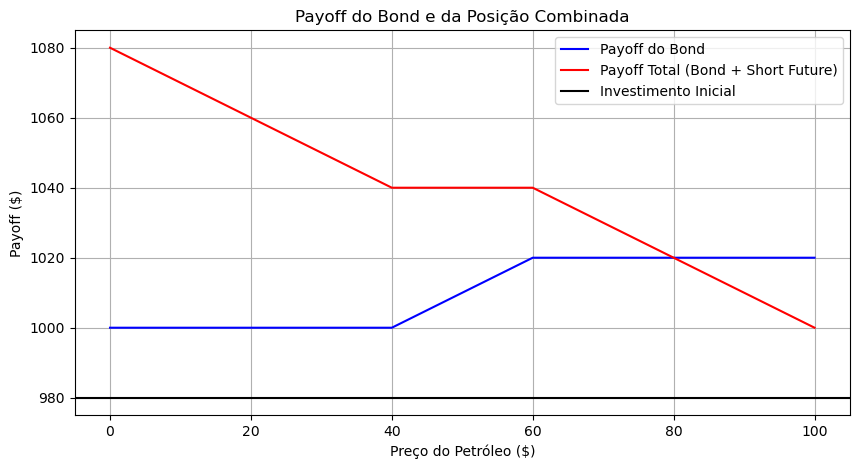

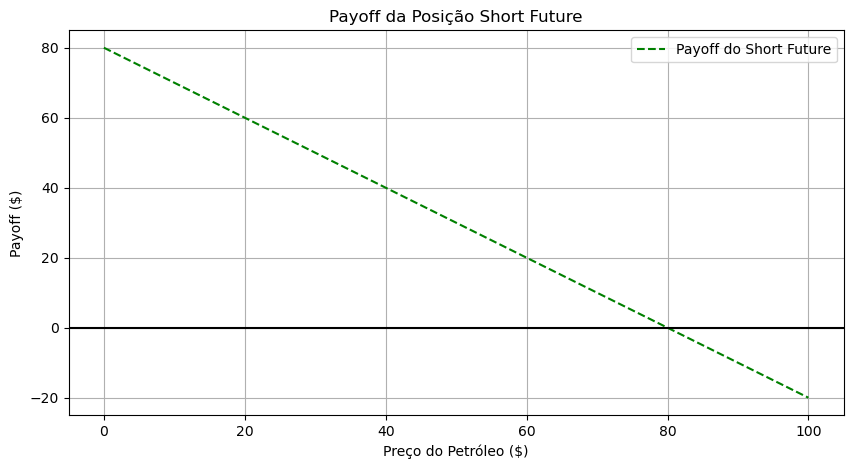

In [18]:
# Parâmetros do investimento
investimento_inicial = 980
pagamento_base = 1000
preco_trigger = 40  # Preço do petróleo para começar a pagar extra
bonus_maximo = 20
preco_futuro_short = 80

# Função de payoff do bond
def payoff_bond(preco_petroleo):
    bonus = np.maximum(preco_petroleo - preco_trigger, 0)
    bonus = np.minimum(bonus, bonus_maximo)
    return pagamento_base + bonus

# Função de payoff da posição short em futuros
def payoff_futuros(preco_petroleo):
    return preco_futuro_short - preco_petroleo

# Simulação de preços do petróleo
precos_petroleo = np.linspace(0, 100, 101)  # De $20 a $100 por barril
payoff_bond_values = np.array([payoff_bond(p) for p in precos_petroleo])
retorno_bond = (payoff_bond_values - investimento_inicial) / investimento_inicial

payoff_futuros_values = np.array([payoff_futuros(p) for p in precos_petroleo])
payoff_total = payoff_bond_values + payoff_futuros_values

# Criar tabela de resultados
df = pd.DataFrame({
    'Preço do Petróleo ($)': precos_petroleo,
    'Payoff do Bond ($)': payoff_bond_values,
    'Retorno do Bond (%)': retorno_bond * 100,
    'Payoff do Short Future ($)': payoff_futuros_values,
    'Payoff Total ($)': payoff_total
})
print(df.head(101))  # Mostra os primeiros 10 resultados

# Plotando os gráficos
plt.figure(figsize=(10, 5))
plt.plot(precos_petroleo, payoff_bond_values, label='Payoff do Bond', color='blue')
plt.plot(precos_petroleo, payoff_total, label='Payoff Total (Bond + Short Future)', color='red')
plt.axhline(y=investimento_inicial, color='black', label='Investimento Inicial')
plt.xlabel('Preço do Petróleo ($)')
plt.ylabel('Payoff ($)')
plt.legend()
plt.title('Payoff do Bond e da Posição Combinada')
plt.grid()
plt.show()

# Gráfico separado para o payoff do short future
plt.figure(figsize=(10, 5))
plt.plot(precos_petroleo, payoff_futuros_values, label='Payoff do Short Future', color='green', linestyle='dashed')
plt.axhline(y=0, color='black')
plt.xlabel('Preço do Petróleo ($)')
plt.ylabel('Payoff ($)')
plt.legend()
plt.title('Payoff da Posição Short Future')
plt.grid()
plt.show()
